In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [6]:
/home/farhaan/ds/metis/metisgh/chi17_ds3/challenges/challenges_data/2013_movies.csv

'/home/farhaan/ds/metis/metisgh/Projects/02-Luther/Challenges'

In [7]:
movies_df = pd.read_csv("/home/farhaan/ds/metis/metisgh/chi17_ds3/challenges/challenges_data/2013_movies.csv")

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


# Challenge 1
**Plot domestic total gross over time**

In [44]:
movies_df['ReleaseDate']=pd.to_datetime(movies_df['ReleaseDate'],infer_datetime_format=True)
movies_df.dropna(subset=['Budget'], inplace=True)

In [45]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 76 to 23
Data columns (total 7 columns):
Title                 89 non-null object
Budget                89 non-null float64
DomesticTotalGross    89 non-null int64
Director              87 non-null object
Rating                89 non-null object
Runtime               89 non-null int64
ReleaseDate           89 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ KB


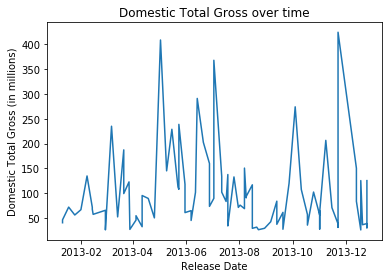

In [46]:
movies_df.sort_values(['ReleaseDate'],inplace=True)
plt.plot(movies_df['ReleaseDate'],movies_df['DomesticTotalGross']/1e6)
plt.title('Domestic Total Gross over time')
plt.ylabel('Domestic Total Gross (in millions)')
plt.xlabel('Release Date')
plt.show()

# Challenge 2
**Plot runtime v/s total domestic gross**

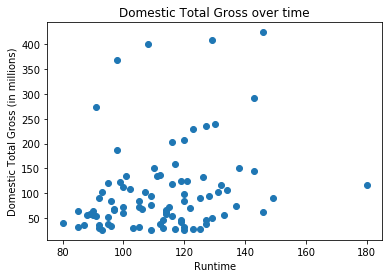

In [47]:
movies_df.sort_values(['Runtime'],inplace=True)
plt.scatter(movies_df['Runtime'],movies_df['DomesticTotalGross']/1e6)
plt.title('Domestic Total Gross over time')
plt.ylabel('Domestic Total Gross (in millions)')
plt.xlabel('Runtime')
plt.show()

# Challenge 3
**Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.**

In [48]:
movies_df.groupby(['Rating'])['Runtime','DomesticTotalGross'].mean()

,Runtime,DomesticTotalGross
Rating,,
PG,99.933,1.311e+08
PG-13,117.585,1.160e+08
R,111.939,7.423e+07


# Challenge 4
**Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.**

In [49]:
movies_df['Rating'].unique()

array(['R', 'PG-13', 'PG'], dtype=object)

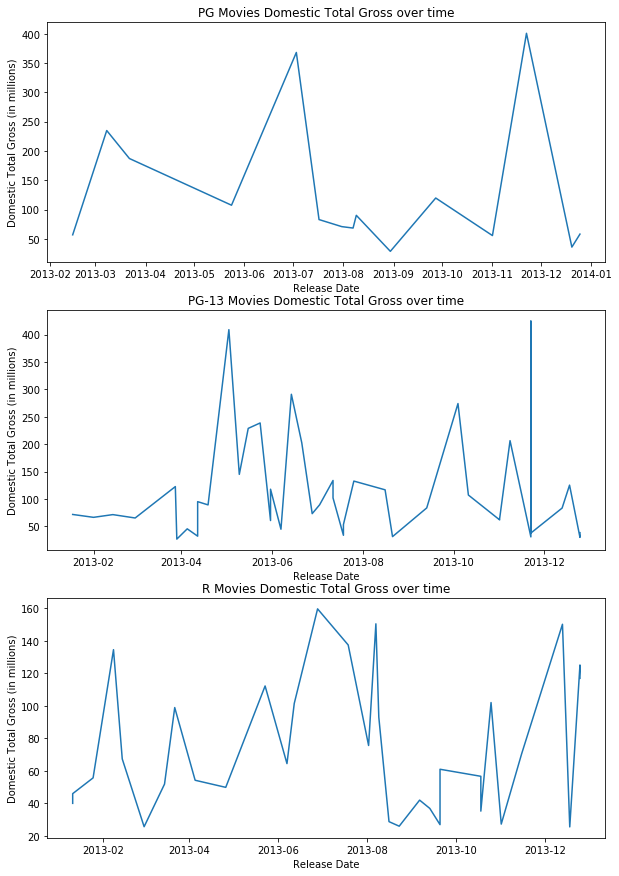

In [62]:
#movies_df_G = movies_df[movies_df['Rating']=="G"].sort_values(['Release Date'])
movies_df_PG = movies_df[movies_df['Rating']=="PG"].sort_values(['ReleaseDate'])
movies_df_PG13 = movies_df[movies_df['Rating']=="PG-13"].sort_values(['ReleaseDate'])
movies_df_R = movies_df[movies_df['Rating']=="R"].sort_values(['ReleaseDate'])

plt.figure(1,figsize=(10,15))
#plt.subplot(411)
#plt.plot(movies_df_G['ReleaseDate'],movies_df_G['DomesticTotalGross']/1e6)

plt.subplot(311)
plt.plot(movies_df_PG['ReleaseDate'],movies_df_PG['DomesticTotalGross']/1e6)
plt.title('PG Movies Domestic Total Gross over time')
plt.ylabel('Domestic Total Gross (in millions)')
plt.xlabel('Release Date')

plt.subplot(312)
plt.plot(movies_df_PG13['ReleaseDate'],movies_df_PG13['DomesticTotalGross']/1e6)
plt.title('PG-13 Movies Domestic Total Gross over time')
plt.ylabel('Domestic Total Gross (in millions)')
plt.xlabel('Release Date')

plt.subplot(313)
plt.plot(movies_df_R['ReleaseDate'],movies_df_R['DomesticTotalGross']/1e6)
plt.title('R Movies Domestic Total Gross over time')
plt.ylabel('Domestic Total Gross (in millions)')
plt.xlabel('Release Date')

plt.show()


# Challenge 5
**Which Director had the highest gross?**

In [79]:
director_gross_df = movies_df.groupby(['Director'])['DomesticTotalGross'].mean()
director_gross_df = director_gross_df.reset_index()
director_gross_df['DomesticTotalGross'] = director_gross_df['DomesticTotalGross']/1e6
director_gross_df.rename(columns={"DomesticTotalGross" : "DomesticTotalGross(in_millions)"},inplace=True)
director_gross_df.sort_values(['DomesticTotalGross(in_millions)'],ascending=False).head(1)

,Director,DomesticTotalGross(in_millions)
26,Francis Lawrence,424.668


# Challenge 6
**Domestic Gross by month**

In [84]:
import datetime

In [89]:
month_df = movies_df
month_df['Release_month'] = pd.DatetimeIndex(month_df['ReleaseDate']).month

In [96]:
month_ind = {'Month':["Jan","Feb","Mar",'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            'Release_month':[1,2,3,4,5,6,7,8,9,10,11,12]}

In [99]:
new_month_df = month_df.merge(pd.DataFrame(month_ind))
grp_month = new_month_df.groupby(['Month'])['DomesticTotalGross'].mean()
grp_month = grp_month.reset_index()

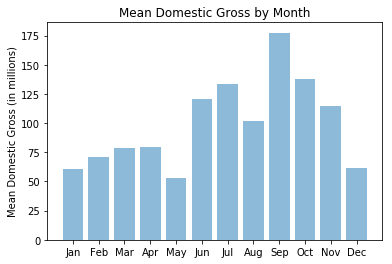

In [101]:
objects = month_ind['Month']
y_pos = np.arange(len(objects))
GrossDomestic = grp_month['DomesticTotalGross']/1e6
 
plt.bar(y_pos,GrossDomestic, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Domestic Gross (in millions)')
plt.title('Mean Domestic Gross by Month')
 
plt.show()
